In [1]:
# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth
from mpl_toolkits import mplot3d
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
import skillsnetwork
await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/peppers.jpeg", overwrite=True)

Saved to '.'


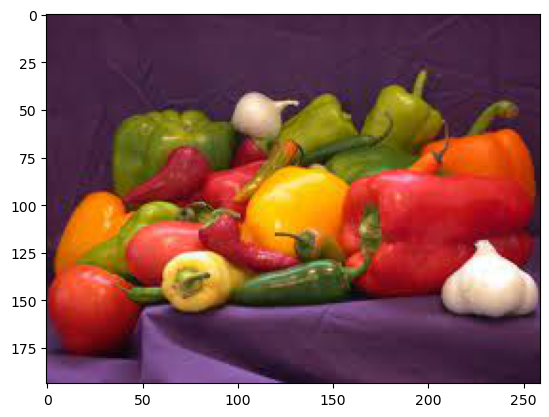

In [3]:
img = cv.imread('peppers.jpeg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

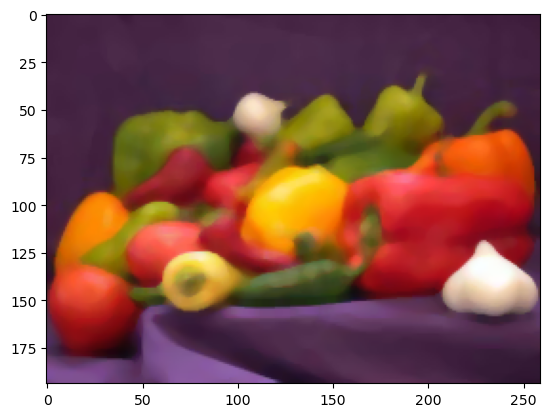

In [4]:
# We will pre-process the image by smoothing it.  

img = cv.medianBlur(img, 7)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

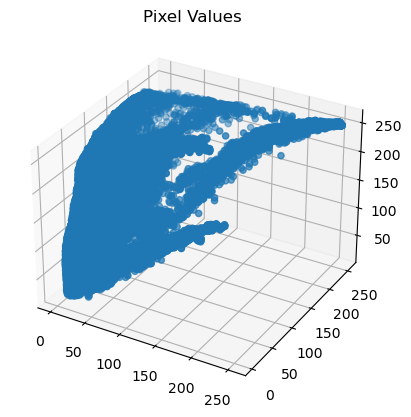

In [5]:
# We can plot the Red, Green, Blue (RGB) values as 3D points.
ax = plt.axes(projection ="3d")
ax.scatter3D(img[:,:,0],img[:,:,1],img[:,:,2])
ax.set_title('Pixel Values ')
plt.show()

In [6]:
# We have a rectangular image with three channels.   
img.shape

(194, 259, 3)

In [7]:
# We convert the image to 194 x 259 rows (194 x 259 = 50246, which is the shape of our matrix) for each pixel, 
# and three columns for each color channel (Red, Green, Blue), as a numpy array of X:
X = img.reshape((-1,3))
print(X)
print("shape: ",X.shape)
print("data type   : ",X.dtype)

[[63 32 65]
 [63 32 65]
 [63 32 65]
 ...
 [45 21 45]
 [45 21 45]
 [45 21 45]]
shape:  (50246, 3)
data type   :  uint8


In [8]:
# As we see, the data type is unit8, so, we need to cast it to be a float32:
X = np.float32(X)
X

array([[63., 32., 65.],
       [63., 32., 65.],
       [63., 32., 65.],
       ...,
       [45., 21., 45.],
       [45., 21., 45.],
       [45., 21., 45.]], dtype=float32)

### Apply Mean Shift to the Image 

In [9]:
# Estimate the bandwidth to use with the mean-shift algorithm, using the estimate_bandwidth function:

# X: array-like of shape (n_samples, n_features) Input points.
# quantile: float, default=0.3 Should be between [0, 1], 0.5 means that the median of all pairwise distances is used.
# n_samples: int, The number of samples to be used. If not given, all samples are to be used.

In [97]:
bandwidth = estimate_bandwidth(X, quantile=.08, n_samples=3000)
bandwidth 

38.30717103654335

In [98]:
# We can create a MeanShift object in sklearn with the following parameters:

# bandwidth:float, default=None Bandwidth used in the RBF kernel.
# max_itert: (default=300) Maximum number of iterations per seed point before the 
# clustering operation terminates (for that seed point), if has not converged yet.
# bin_seeding :if true, initial kernel locations are not locations of all points, 
# but rather the location of the discretized version of points.
# We then fit the model.

In [138]:
ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=38.30717103654335, bin_seeding=True)

In [139]:
# Now, we have the label corresponding to the label of each row.
labeled=ms.labels_
labeled

array([0, 0, 0, ..., 0, 0, 0])

In [140]:
# For each sample, we can find the assigned clusters:
clusters=ms.predict(X)
clusters

array([0, 0, 0, ..., 0, 0, 0])

In [141]:
# We can list the unique clusters.  
np.unique(labeled)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [142]:
# We can also list the actual cluster centroid locations, which are also the RGB values:
ms.cluster_centers_

array([[ 67.15332 ,  37.94713 ,  70.118576],
       [ 31.674858,  28.503044, 169.84755 ],
       [ 25.595106,  94.52854 ,  99.73665 ],
       [ 25.263466, 126.24335 , 137.24107 ],
       [135.98688 ,  77.64851 , 121.38697 ],
       [ 10.718855, 113.13131 , 239.18575 ],
       [185.42105 , 211.78099 , 237.97113 ],
       [156.64532 , 183.43599 , 215.67128 ],
       [234.45396 , 243.42398 , 250.23769 ],
       [ 88.28052 , 214.48051 , 248.43117 ]], dtype=float32)

In [143]:
# We can convert the clusters unit8 datatype for images:
cluster_int8=np.uint8(ms.cluster_centers_)
cluster_int8

array([[ 67,  37,  70],
       [ 31,  28, 169],
       [ 25,  94,  99],
       [ 25, 126, 137],
       [135,  77, 121],
       [ 10, 113, 239],
       [185, 211, 237],
       [156, 183, 215],
       [234, 243, 250],
       [ 88, 214, 248]], dtype=uint8)

In [144]:
# We can also estimate what cluster each sample belongs to, as follows:
ms.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

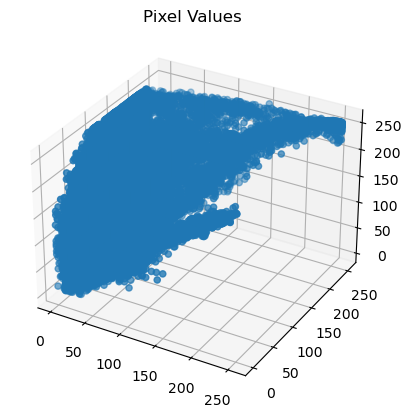

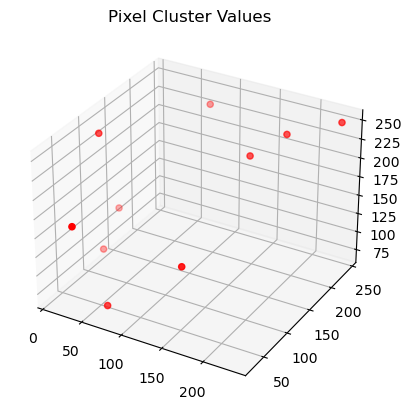

In [145]:
ax = plt.axes(projection ="3d")
ax.scatter3D(img[:,:,0],img[:,:,1],img[:,:,2])
ax.set_title('Pixel Values ')
plt.show()

ax = plt.axes(projection ="3d")
ax.set_title('Pixel Cluster Values  ')
ax.scatter3D(cluster_int8[:,0],cluster_int8[:,1],cluster_int8[:,2],color='red')
plt.show()

In [146]:
# We can assign each data point to the cluster value and reshape it back  to a Rectangular image. 
result=np.zeros(X.shape,dtype=np.uint8)

for label in np.unique(labeled):
    result[labeled==label,:]=cluster_int8[label,:]    
    

result=result.reshape(img.shape)

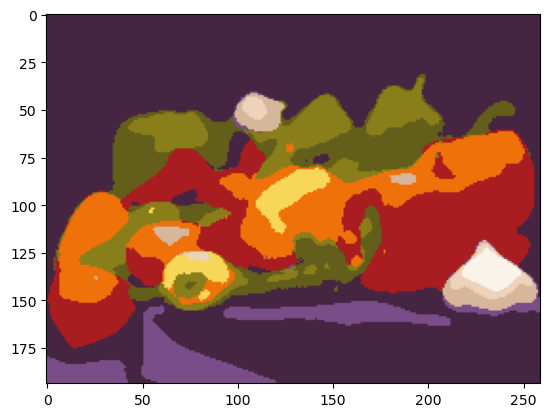

In [147]:
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.show()

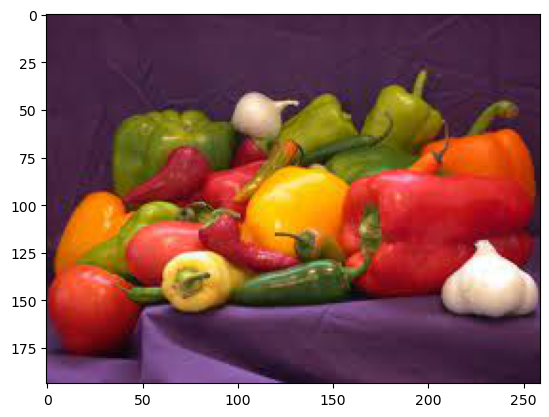

In [148]:
# comparing original image
img = cv.imread('peppers.jpeg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

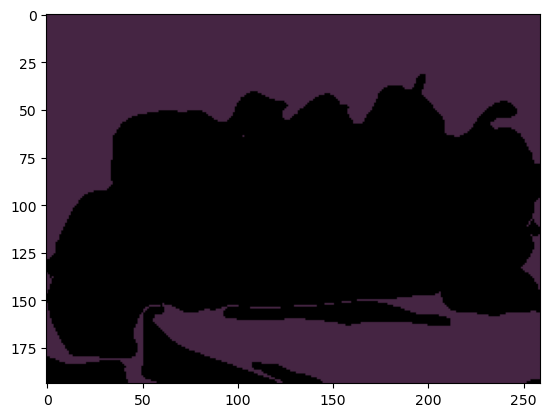

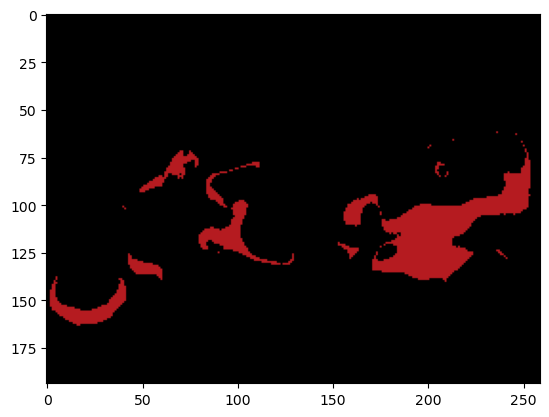

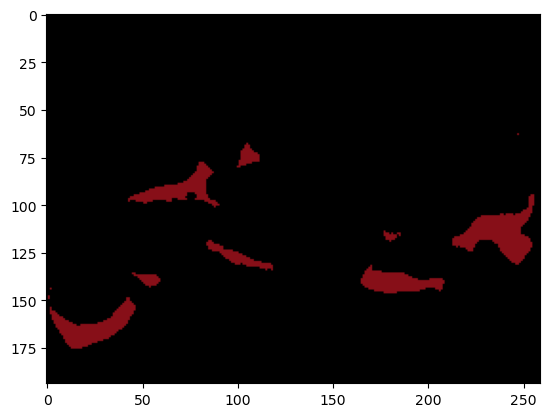

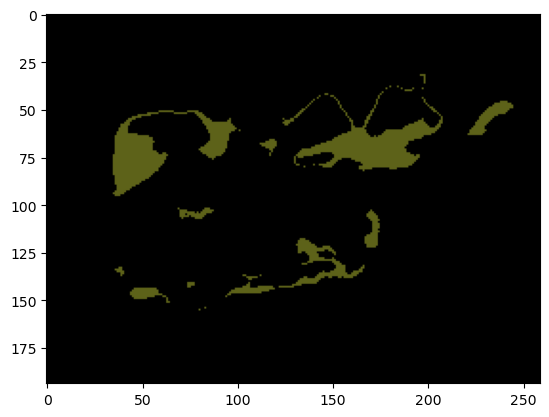

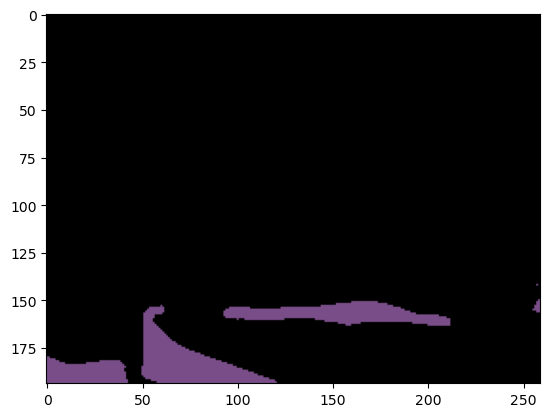

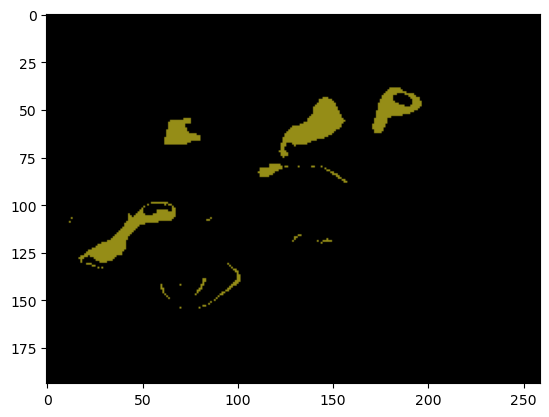

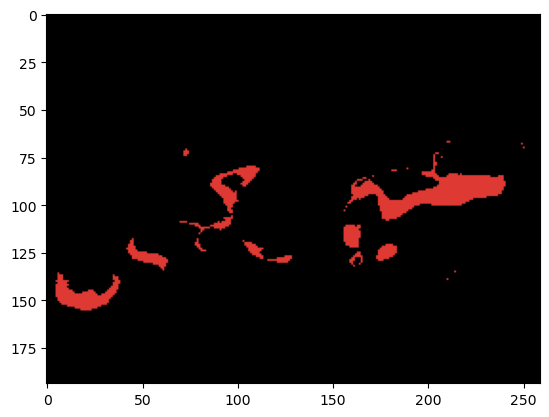

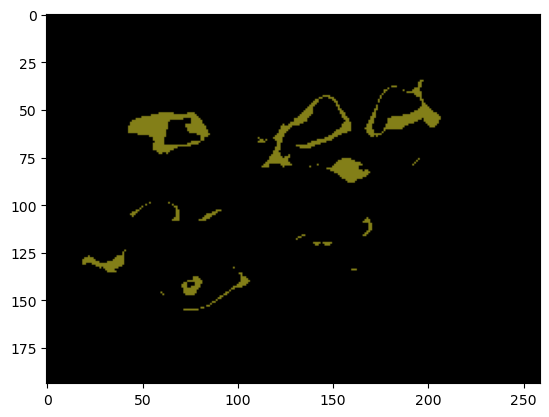

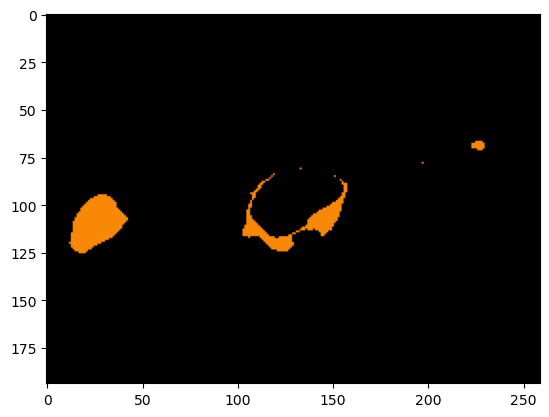

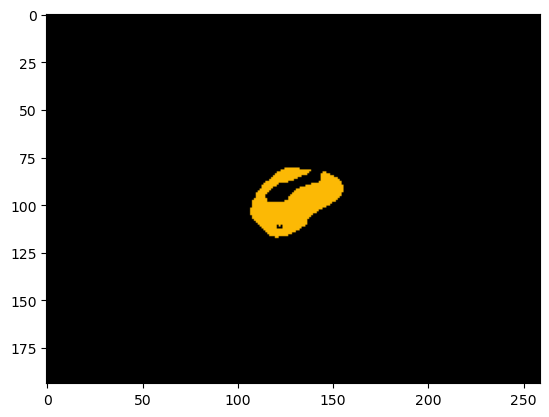

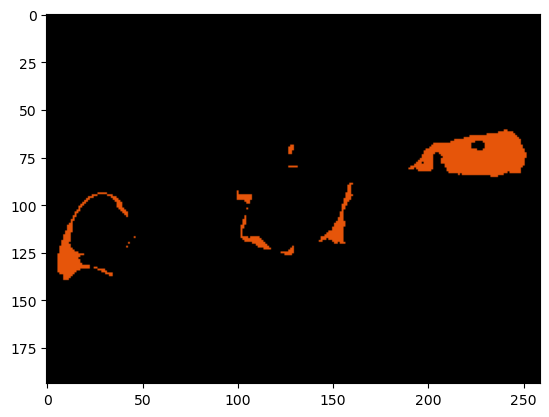

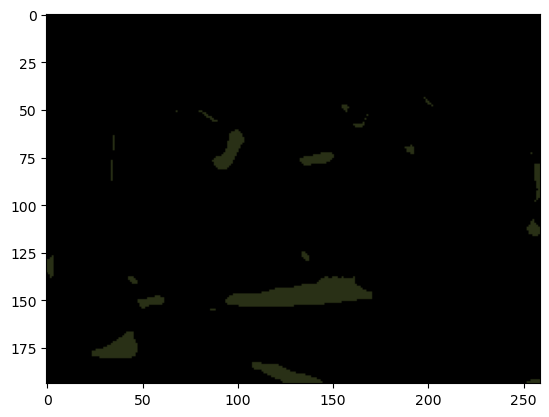

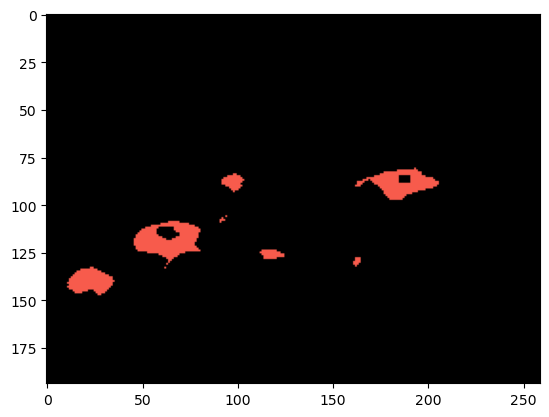

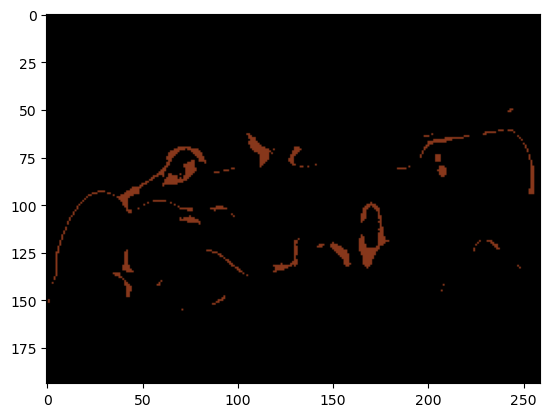

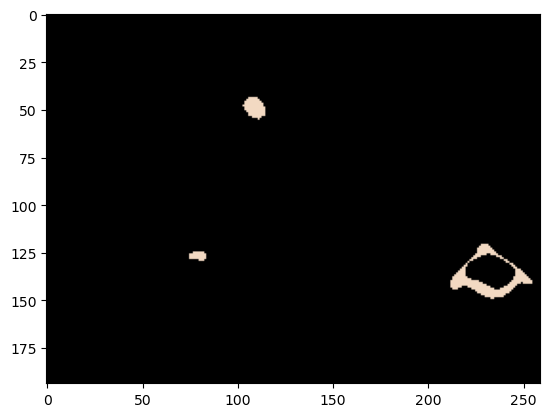

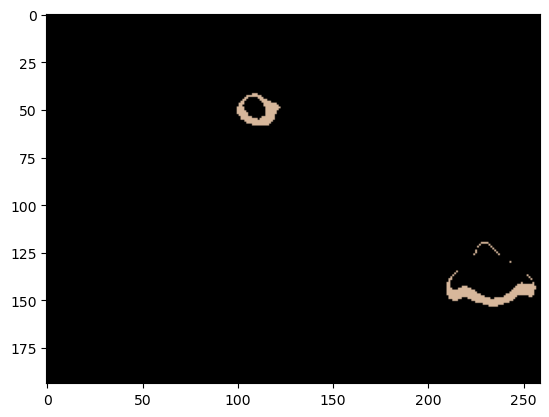

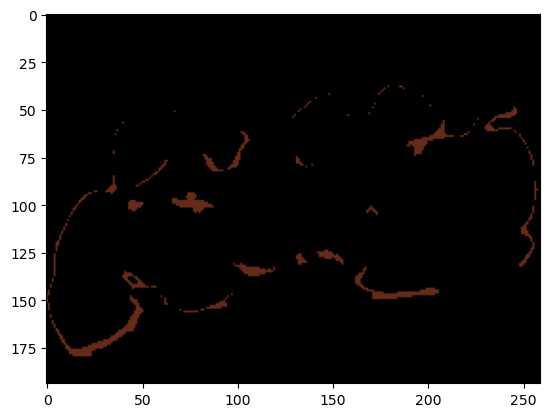

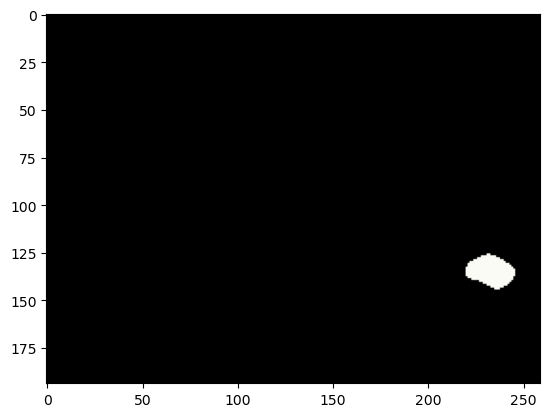

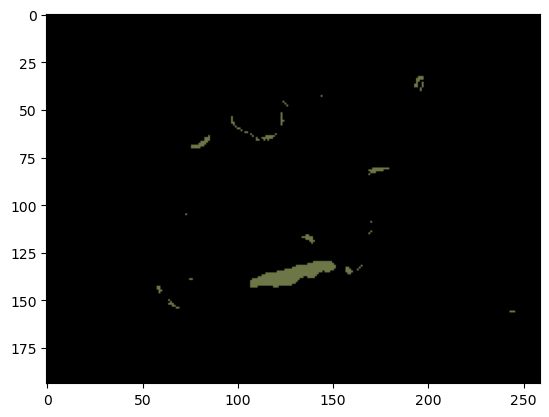

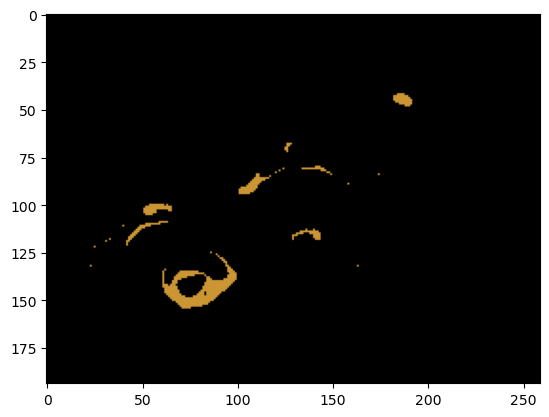

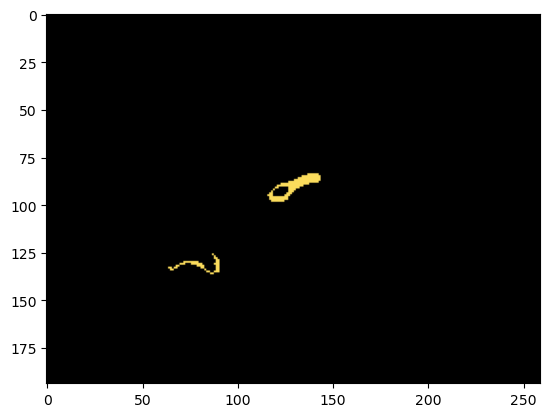

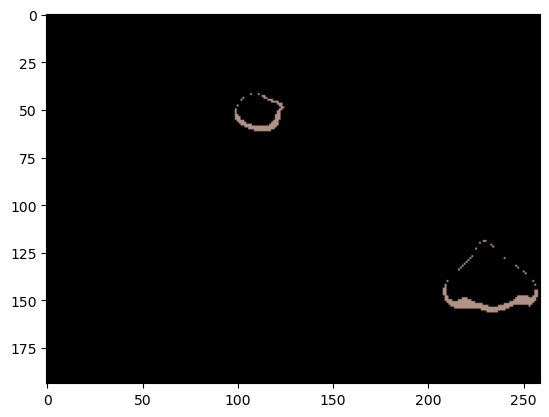

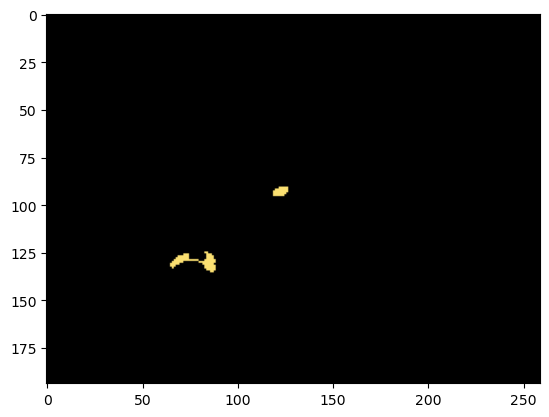

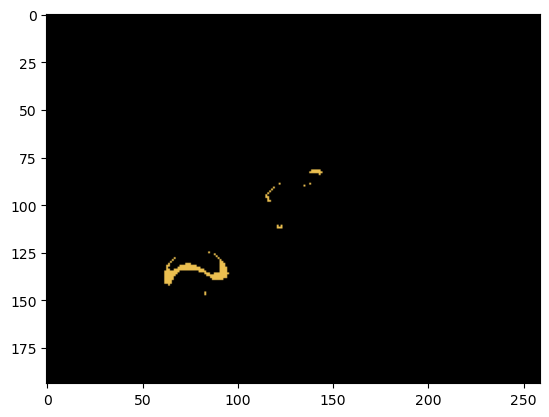

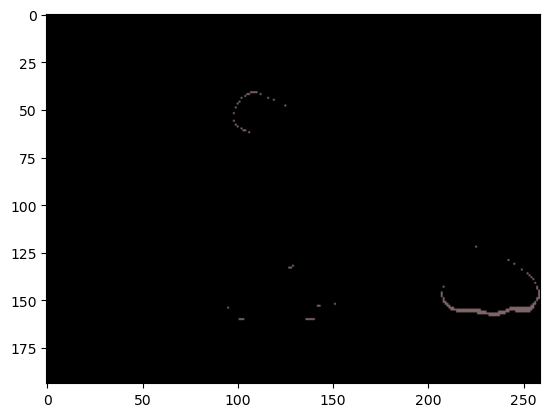

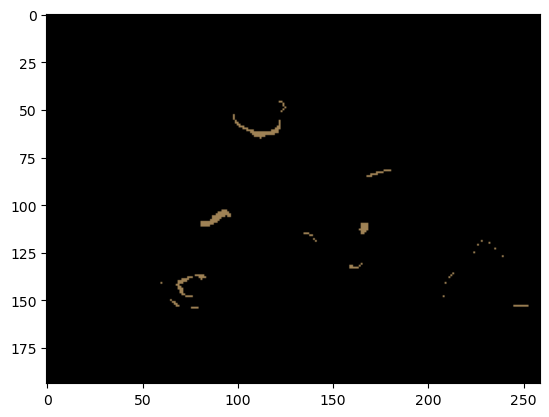

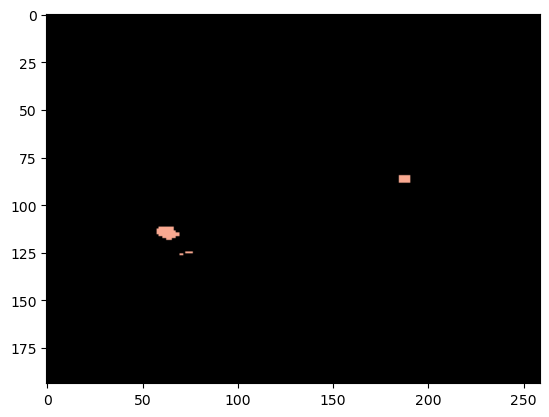

In [135]:
# We now plot each cluster, as a cluster value, and we see that each cluster corresponds to a different object.
for label in np.unique(labeled):
    result=np.zeros(X.shape,dtype=np.uint8)
    result[labeled==label,:]=cluster_int8[label,:]  
    plt.imshow(cv.cvtColor(result.reshape(img.shape), cv.COLOR_BGR2RGB))
    plt.show()

In [136]:
# Therefore, we have classified our images according to their different vegetable types, 
# using the Mean Shift Clustering.